In [1]:
import pandas as pd
import numpy as np

In [2]:
df_obesidade = pd.read_csv("db/obesity-cleaned.csv")

### Analisando dados da tabela

In [3]:
df_obesidade

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


### Obesity (%) possui valores vazios, esta como string e possui desvio padrão no dado

In [4]:
df_obesidade["Obesity (%)"].value_counts()

No data            504
0.4 [0.1-1.0]       55
0.6 [0.2-1.3]       47
0.3 [0.1-0.7]       46
0.3 [0.1-0.8]       46
                  ... 
9.5 [6.7-13.1]       1
4.4 [2.2-7.6]        1
14.1 [9.1-20.3]      1
9.8 [6.9-13.4]       1
4.7 [2.5-8.0]        1
Name: Obesity (%), Length: 16375, dtype: int64

In [5]:
df_obesidade["Obesity (%)"].iloc[0]

'0.5 [0.2-1.1]'

In [6]:
df_obesidade.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

### Remoção da coluna 'Unnamed: 0', remoção do desvio padrão na coluna obesity

In [7]:
del df_obesidade['Unnamed: 0']

In [8]:
df_obesidade["Obesity"] = df_obesidade["Obesity (%)"].apply(lambda x: x.split()[0])
df_obesidade["Obesity"].value_counts()

No      504
0.4     222
0.6     218
0.5     217
0.7     210
       ... 
60.1      1
56.3      1
59.8      1
55.5      1
46.5      1
Name: Obesity, Length: 602, dtype: int64

### Remover valores "No" da coluna obesity

In [9]:
df_obesidade.loc[df_obesidade["Obesity"] == "No", "Obesity"] = np.nan #converter para nan

In [10]:
df_obesidade["Obesity"] = df_obesidade["Obesity"].dropna()

In [11]:
df_obesidade["Obesity"].value_counts()

0.4     222
0.6     218
0.5     217
0.7     210
0.8     201
       ... 
62.1      1
56.8      1
54.1      1
60.0      1
46.5      1
Name: Obesity, Length: 601, dtype: int64

### Converter para float "Obesity" e int "Year"

In [12]:
df_obesidade["Obesity"] = df_obesidade["Obesity"].apply(lambda x: float(x))
df_obesidade["Year"] = df_obesidade["Year"].apply(lambda x: int(x))

In [13]:
df_obesidade

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


### Definindo "Year" como index

In [14]:
df_obesidade.set_index("Year", inplace=True)

In [15]:
df_obesidade

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


### Busca da média de obesidade por ano (2015) separado por sexo

In [16]:
df_obesidade[df_obesidade.index == 2015].groupby("Sex").mean()

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


### Definindo um período de busca

In [17]:
df_obesidade_start = df_obesidade[df_obesidade.index == 1975]
df_obesidade_end = df_obesidade[df_obesidade.index == 2016]

### Definindo index como "Country"

In [18]:
df_obesidade_start.set_index("Country", inplace=True)
df_obesidade_end.set_index("Country", inplace=True)

### Buscando ambos os sexos

In [19]:
df_obesidade_end[df_obesidade_end["Sex"] == "Both sexes"]["Obesity"]

Country
Afghanistan                            5.5
Albania                               21.7
Algeria                               27.4
Andorra                               25.6
Angola                                 8.2
                                      ... 
Venezuela (Bolivarian Republic of)    25.6
Viet Nam                               2.1
Yemen                                 17.1
Zambia                                 8.1
Zimbabwe                              15.5
Name: Obesity, Length: 195, dtype: float64

### Calculando evolução da obesidade no período avaliado

In [20]:
df_obesidade_evolucao = df_obesidade_end[df_obesidade_end["Sex"] == "Both sexes"]["Obesity"] - df_obesidade_start[df_obesidade_start["Sex"] == "Both sexes"]["Obesity"]

In [21]:
df_obesidade_evolucao.sort_values().dropna().head() ## maior evolução, retirado países sem dados

Country
Viet Nam       2.0
Singapore      3.1
Japan          3.3
Bangladesh     3.4
Timor-Leste    3.6
Name: Obesity, dtype: float64

In [22]:
df_obesidade_evolucao.sort_values().dropna().tail() ## menor evolução, retirado países sem dados

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

### Países com menor e maior evolução na taxa de obesidade

In [23]:
df_obesidade_end[df_obesidade_end.index == "Tuvalu"]

,Obesity (%),Sex,Obesity
Country,,,
Tuvalu,51.6 [45.0-57.9],Both sexes,51.6
Tuvalu,47.0 [37.7-56.4],Male,47.0
Tuvalu,56.2 [47.3-64.4],Female,56.2


In [24]:
df_obesidade_end[df_obesidade_end.index == "Viet Nam"]

,Obesity (%),Sex,Obesity
Country,,,
Viet Nam,2.1 [1.4-3.1],Both sexes,2.1
Viet Nam,1.6 [0.8-2.8],Male,1.6
Viet Nam,2.6 [1.5-4.2],Female,2.6


### Busca do país com maior e menor índice de obesidade no ano de 2015

In [25]:
df_2015 = df_obesidade[df_obesidade.index == 2015]
df_2015[df_2015["Obesity"] == df_2015["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [26]:
df_2015 = df_obesidade[df_obesidade.index == 2015]
df_2015[df_2015["Obesity"] == df_2015["Obesity"].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


### Buscar a diferença entre obesidade, durante os anos no Brazil

In [27]:
df_brazil = df_obesidade[df_obesidade["Country"] == "Brazil"]

<AxesSubplot:xlabel='Year'>

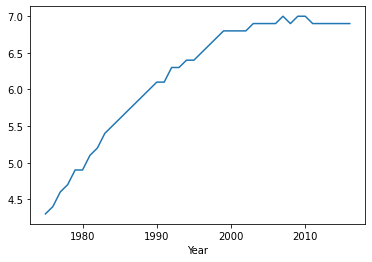

In [28]:
(df_brazil[df_brazil["Sex"] == "Female"]["Obesity"] - df_brazil[df_brazil["Sex"] == "Male"]["Obesity"]).plot()

Mulheres tem se tornado mais obesas em relação aos homens

### Comportamento da obesidade ano a ano

<AxesSubplot:xlabel='Year'>

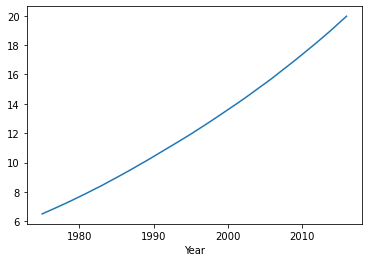

In [29]:
df_both = df_obesidade[df_obesidade["Sex"] == "Both sexes"]
df_both.groupby("Year")["Obesity"].mean().plot()

## PIB per capta

In [30]:
df_gdp = pd.read_csv("db/GDP.csv", decimal=".")
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


### Limpar e tratar os dados e converter para tipos adequados

In [31]:
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1])) #Separar dia do ano, selecionar o ano e converter para int
df_gdp["Year"]

0       1901
1       1906
2       1911
3       1916
4       1921
        ... 
4414    1991
4415    1996
4416    2001
4417    2006
4418    2011
Name: Year, Length: 4419, dtype: int64

In [32]:
df_gdp["gdp_pp"] = df_gdp[' GDP_pp '].apply(lambda x: float(x.split()[0].replace(",","")))
df_gdp["gdp_pp"] #Conversão do valor do PIB para float, retirando a virgula da casa dos milhares

0       613.99
1       624.04
2       634.25
3       647.28
4       662.40
         ...  
4414    782.09
4415    781.50
4416    719.96
4417    520.17
4418    526.33
Name: gdp_pp, Length: 4419, dtype: float64

In [33]:
del df_gdp[' GDP_pp ']  

In [34]:
df_gdp ## Tabela com dados limpos

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


Ano de primeiro registro

In [35]:
df_gdp.groupby("Country")["Year"].min()

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

Regiões com maiores crescimentos de PIB per capita no século passado.

In [36]:
df_gdp[df_gdp["Year"] < 2000].max() ##buscando ultimo ano de registro

Country              Zimbabwe
Region     Sub-Saharan Africa
Year                     1996
gdp_pp               118681.3
dtype: object

In [37]:
df_gdp_start = df_gdp[df_gdp["Year"] == 1901]
df_gdp_end = df_gdp[df_gdp["Year"] == 1996]

Regiões com maiores crescimentos percentuais no século passado ordenado

In [38]:
((df_gdp_end.groupby("Region")["gdp_pp"].mean() / df_gdp_start.groupby("Region")["gdp_pp"].mean() -1) * 100).sort_values()

Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name: gdp_pp, dtype: float64

Preenchimento dos anos ausentes, usando uma estimativa dos registros anteriores e posteriores

In [39]:
df_gdp

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


Anos vazios

In [40]:
array_year = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max()) ##Criando array usando como alcance o valor minimo e máximo do ano

In [41]:
df_all_years = pd.DataFrame(array_year, columns=["Year"]) ##Criando um dataframe com os anos

In [42]:
df_all_years.index = df_all_years["Year"]

In [43]:
df_years_off = ~df_all_years["Year"].isin(df_gdp["Year"]) ## Selecionando os anos que não estão presentes do dataframe

In [44]:
df_years_off = df_all_years.loc[df_years_off].index ##Anos que não estão presentes no dataframe

In [45]:
df_years_off 

Int64Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
            1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
            1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
            1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
            1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
            1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
            1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
            1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year')

In [46]:
df_gdp = df_gdp.sort_values(["Country", "Year"])

In [47]:
df_gdp["delta_gdp"] = df_gdp["gdp_pp"] - df_gdp["gdp_pp"].shift(1) ##Variação do PIB a cada pesquisa
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1) ##Intervalo entre pesquisas
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1) ## Quanto subiu ano a ano

In [48]:
df_gdp

,Country,Region,Year,gdp_pp,delta_gdp,delta_year,gdp_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094
...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232


In [49]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
del df_gdp["delta_gdp"],df_gdp["delta_year"]

In [50]:
df_gdp.head(5)

,Country,Region,Year,gdp_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0


### Criação de um novo DataFrame para agrupar os dados dos anos estimados

In [51]:
df_new_data = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    if row["Year"] == 2011:
        continue
    
    years_to_add = df_years_off[(df_years_off < row["next_year"]) & (df_years_off > row["Year"])]
    
    for new_year in years_to_add:
        add_row = row.copy()
        add_row["gdp_pp"] = (new_year - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp_pp"]
        add_row["Year"] = new_year
        add_row["Kind"] = "estimated"
        df_new_data = pd.concat([df_new_data, add_row.to_frame().transpose()])

In [52]:
df_new_data

,Country,Region,Year,gdp_pp,gdp_year,next_year,Kind
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1907,626.082,2.042,1911.0,estimated
...,...,...,...,...,...,...,...
4416,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
4417,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


### Junção dos dois DataFrames, um com dados reais e outro com dados estimados

In [53]:
df_gdp = pd.concat([df_gdp, df_new_data])

In [54]:
df_gdp.sort_values(["Country", "Year"], inplace=True)

In [55]:
df_gdp.index = df_gdp["Year"]

In [56]:
df_gdp["Kind"].fillna("real", inplace=True)

In [57]:
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,Kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.0,2.01,1906.0,estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.01,2.01,1906.0,estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.02,2.01,1906.0,estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.03,2.01,1906.0,estimated
...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated


### Visualização em gráfico da evolução do PIB do Brazil com dados estimados e dados reais

<AxesSubplot:xlabel='Year', ylabel='gdp_pp'>

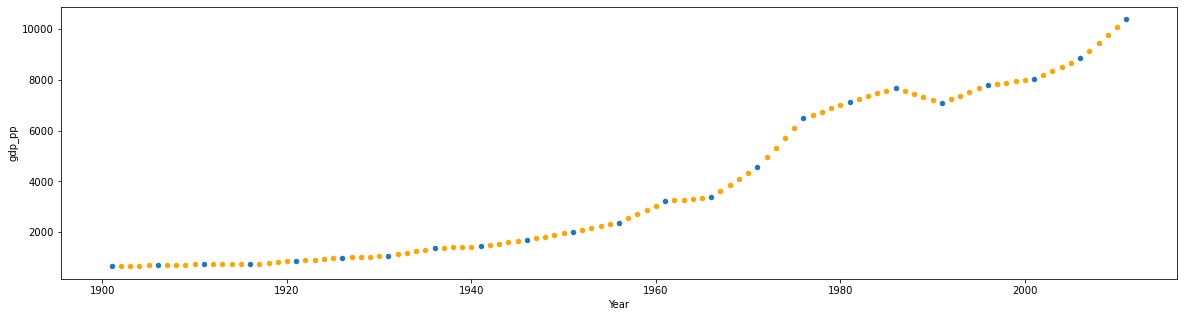

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))

country = "Brazil"
df_gdp[(df_gdp["Kind"] == "real") & (df_gdp["Country"] == country)].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax)
df_gdp[(df_gdp["Kind"] == "estimated") & (df_gdp["Country"] == country)].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="orange")

In [61]:
df_gdp["Year"] = df_gdp["Year"].astype(int)
df_gdp["gdp_pp"] = df_gdp["gdp_pp"].astype(float)

### Usando o plotly para mostrar evolução do PIB durante os anos

In [62]:
import plotly.express as px

df = px.data.gapminder()

In [63]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


## Extrair iso_alpha do país usando um Dataframe do plotly

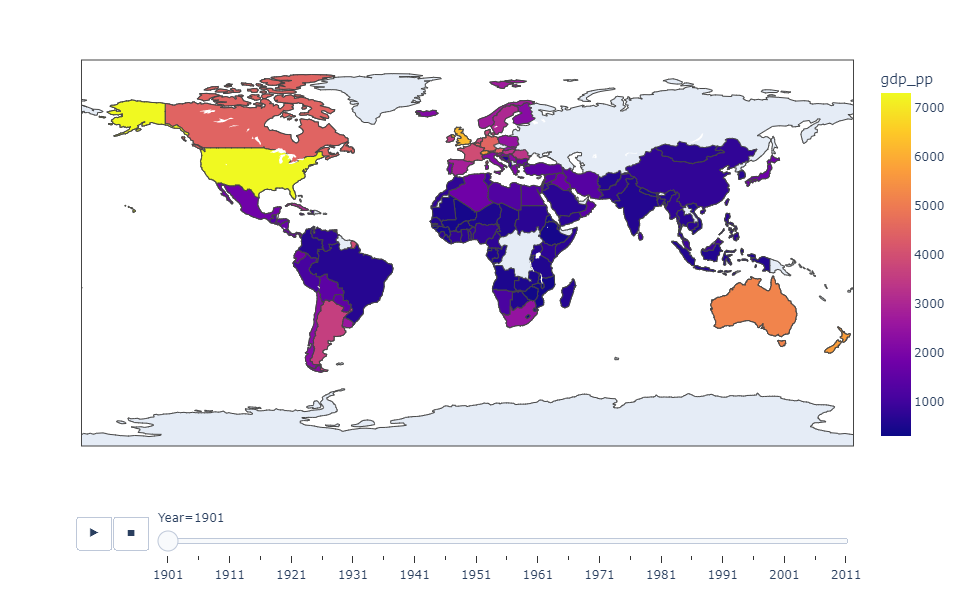

In [68]:
dict_iso_alpha = df.set_index("country").to_dict()["iso_alpha"] ##Usando o dataframe para criar um dicionario
dict_num = {j: i for i, j in enumerate(df_gdp["Country"].unique())} ##criando um dicionario numérico com os países presentes no nosso dataframe

df_gdp["iso_alpha"] = df_gdp["Country"].map(dict_iso_alpha) ##Criação da coluna iso_alpha
df_gdp["iso_num"] = df_gdp["Country"].map(dict_num)  ##Criação da coluna iso_num

fig = px.choropleth(df_gdp[df_gdp["Kind"] == "real"].reset_index(drop=True), locations="iso_alpha", color="gdp_pp", hover_name="Country", animation_frame="Year")
##Somente foram usados dados reais e não estimados
fig.update_layout(height=600)
fig.show()

In [73]:
df_obesidade["country-year"] = df_obesidade["Country"] + "-" + df_obesidade.reset_index()["Year"].apply(lambda x: str(int(x))).values

In [74]:
dict_obesity_year = df_obesidade.set_index("country-year").to_dict()["Obesity"]

In [75]:
df_gdp["country-year"] = df_gdp["Country"] + "-" + df_gdp["Year"].apply(lambda x: str(int(x))).values

In [77]:
df_gdp["Obesity"] = df_gdp["country-year"].map(dict_obesity_year)

In [78]:
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,Kind,iso_alpha,iso_num,country-year,Obesity
Year,,,,,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.990,2.01,1906.0,real,AFG,0,Afghanistan-1901,NaN
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",1902,616.000,2.01,1906.0,estimated,AFG,0,Afghanistan-1902,NaN
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",1903,618.010,2.01,1906.0,estimated,AFG,0,Afghanistan-1903,NaN
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",1904,620.020,2.01,1906.0,estimated,AFG,0,Afghanistan-1904,NaN
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",1905,622.030,2.01,1906.0,estimated,AFG,0,Afghanistan-1905,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2007,21.3
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2008,21.7
2009,Zimbabwe,Sub-Saharan Africa,2009,523.866,1.232,2011.0,estimated,ZWE,192,Zimbabwe-2009,22.2


In [79]:
df_gdp_clean = df_gdp.dropna()

## Possui correlação entre o crescimento médio do PIB e o crescimento médio da obesidade no mundo

In [84]:
df_gdp_clean.reset_index(drop=True).groupby("Year")[["Obesity", "gdp_pp"]].mean().corr()

,Obesity,gdp_pp
Obesity,1.000000,0.969378
gdp_pp,0.969378,1.000000
